# Replot some graphs

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# read data
print(f"Importing data...")
ran_df = pd.read_csv("../results/random_preprocessed.csv.gz", compression='gzip', low_memory=0)

ran_df = ran_df[ran_df["FoldXddG"] < 500]
print("1 random variant has FoldXddG > 500 and will be removed.")

ran_df = ran_df[ran_df["SimpleClassRIN"] != "Disorder"]
print(f"{ran_df.shape[0]} random variants after removal of 'Disorder' str class.")

# map sctructure classes to groups
ran_df["SimpleClassRIN"] = ran_df["SimpleClassRIN"].map({'Protein interaction': 'Protein_interaction', 
                       'Surface': 'Surface',
                       'Core': 'Core',
                       'ligand interaction': 'Other_interactions',
                       'DNA interaction': 'Other_interactions',
                       'ion interaction': 'Other_interactions',
                       'metal interaction': 'Other_interactions',
                       'RNA interaction': 'Other_interactions',
                       'Peptide interaction': 'Other_interactions',
                      })

ran_df["Sub"] = ran_df["AA1"] + ">" + ran_df["AA2"]


Importing data...
1 random variant has FoldXddG > 500 and will be removed.
190438 random variants after removal of 'Disorder' str class.


In [16]:
def plot_dist_random(df, 
                     feature,
                     xlim=None, 
                     savepath=None, 
                     verbose=False):
    """
    Plot feature distribution by ClinVar class.
    Args:
      df: a pandas dataframe. Should include a column "CV.SigShort".
      feature: a name of the feature to plot.
      xlim: a tuple (x_min, x_max). (Default: None)
      kde: whether to plot distribution. (Default: True)
      boxplot: whether to show boxplots. (Default: True)
      savepath: a path to save the plot. (Default: None)
      verbose: whether to print log messages. (Default: False)
    Returns:
      nothing; plots 3 graphs.
    """
    sns.set(style="white", font_scale=1.3)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15, 10),
                                             gridspec_kw={'height_ratios': [3, 3, 3, 3]})
    
    if verbose: print(f"{df[df[feature] == '?'].shape[0]} allels have undefined {feature} and will be removed.")
    df_filtered = df[df[feature] != "?"]
    df_filtered[feature] = pd.to_numeric(df_filtered[feature])
    
    if xlim:
        if verbose: 
            print(f"xlim argument provided; {df_filtered[(df_filtered[feature] < xlim[0]) | (df_filtered[feature] > xlim[1])].shape[0]} allels will be removed.")
        df_filtered = df_filtered[(df_filtered[feature] > xlim[0]) & (df_filtered[feature] < xlim[1])]
    
    classes = ["Core", "Surface", "Protein_interaction", "Other_interactions"]
    col_legend = {"Core": "darkorange", 
                  "Surface": "dodgerblue", 
                  "Protein_interaction": "forestgreen", 
                  "Other_interactions": "crimson"}
    
    sns.distplot(df_filtered[feature], color="grey", kde=False, ax=ax1)
    
    sns.histplot(data=df_filtered, x=feature, hue="SimpleClassRIN", stat="count", palette=col_legend, ax=ax2)
        
    sns.kdeplot(data=df_filtered, x=feature, hue="SimpleClassRIN", palette=col_legend, ax=ax3, cut=1, shade=True)
    
    sns.boxplot(data=df_filtered, x=feature, y="SimpleClassRIN", color="SimpleClassRIN",
                orient="h", ax=ax4, linewidth=2, palette=col_legend,
                order=classes)
        
    ax1.set_xlabel('')
    ax2.set_xlabel("")
    ax3.set_xlabel("")
    ax4.set_xlabel(f"{feature}")
            
    ax1.set_ylabel('counts')
    ax2.set_ylabel('counts')
    ax3.set_ylabel('density')
    ax4.set_ylabel("")

    if xlim: plt.xlim(xlim[0], xlim[1])
        
    if savepath: 
        plt.savefig(f"{savepath}/{feature}.png", bbox_inches='tight')
        plt.close()
    else: plt.show();

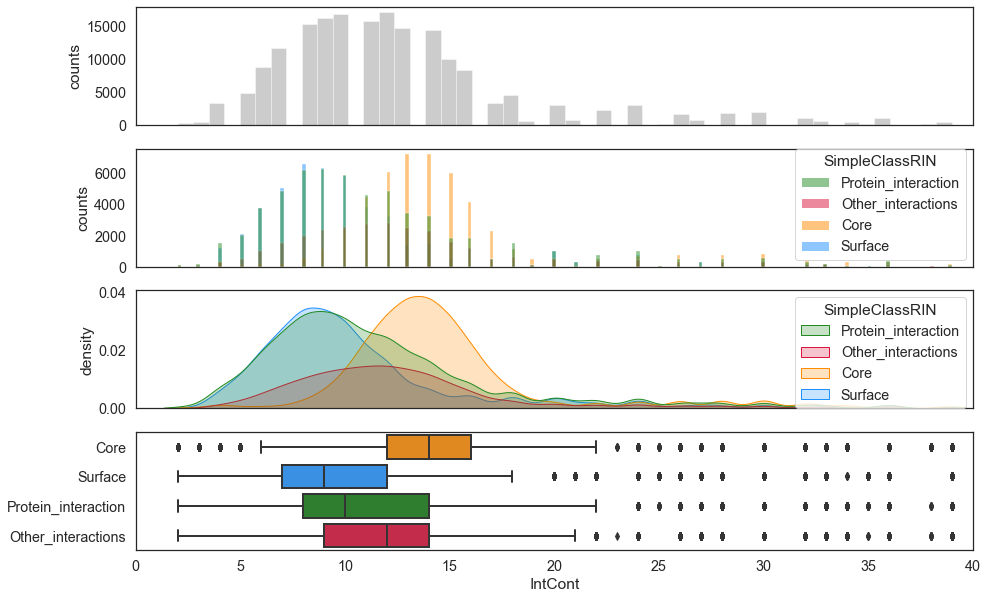

In [18]:
df_filtered = ran_df

plot_dist_random(df_filtered, "IntCont", xlim=(0, 40))

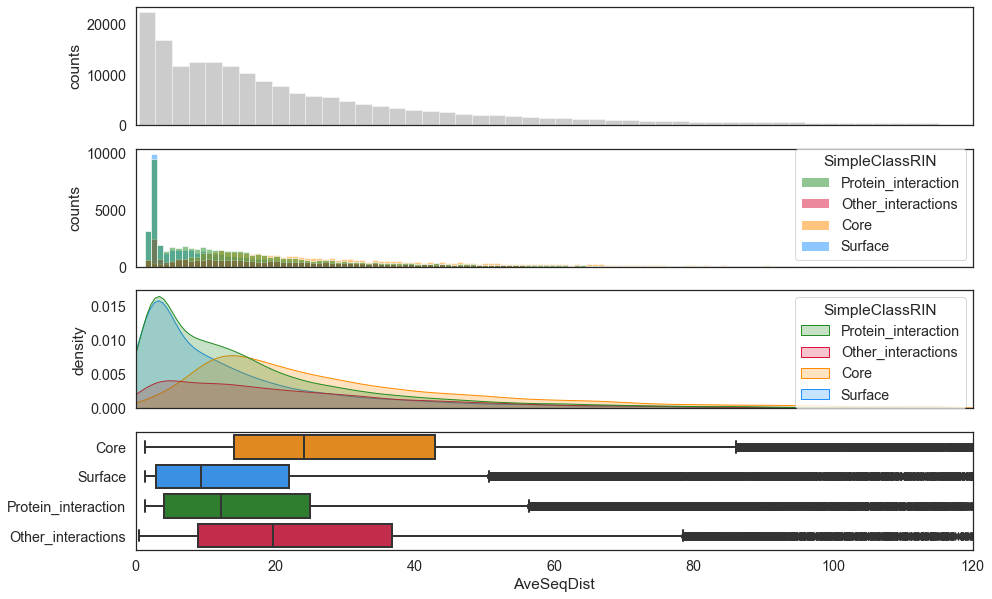

In [20]:
df_filtered = ran_df

plot_dist_random(df_filtered, "AveSeqDist", xlim=(0, 120))

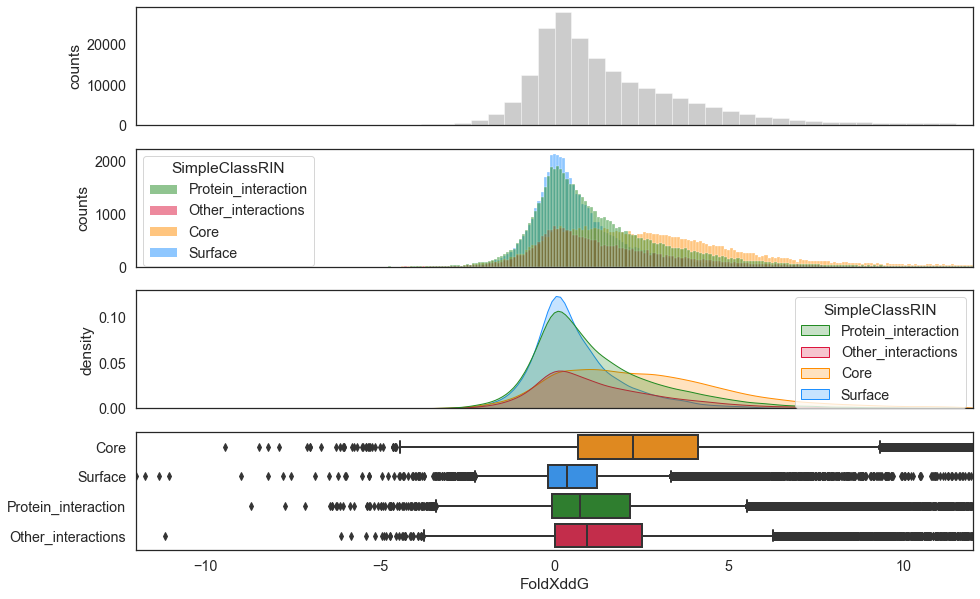

In [25]:
plot_dist_random(df_filtered, "FoldXddG", xlim=(-12, 12))


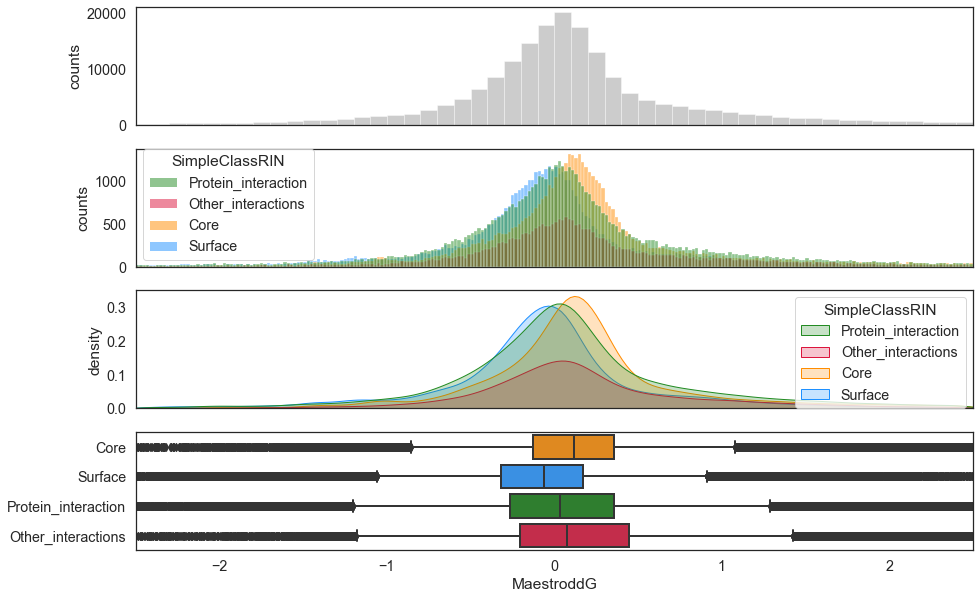

In [27]:
plot_dist_random(df_filtered, "MaestroddG", xlim=(-2.5, 2.5))


Text(0.5, 1.0, 'MaestroddG')

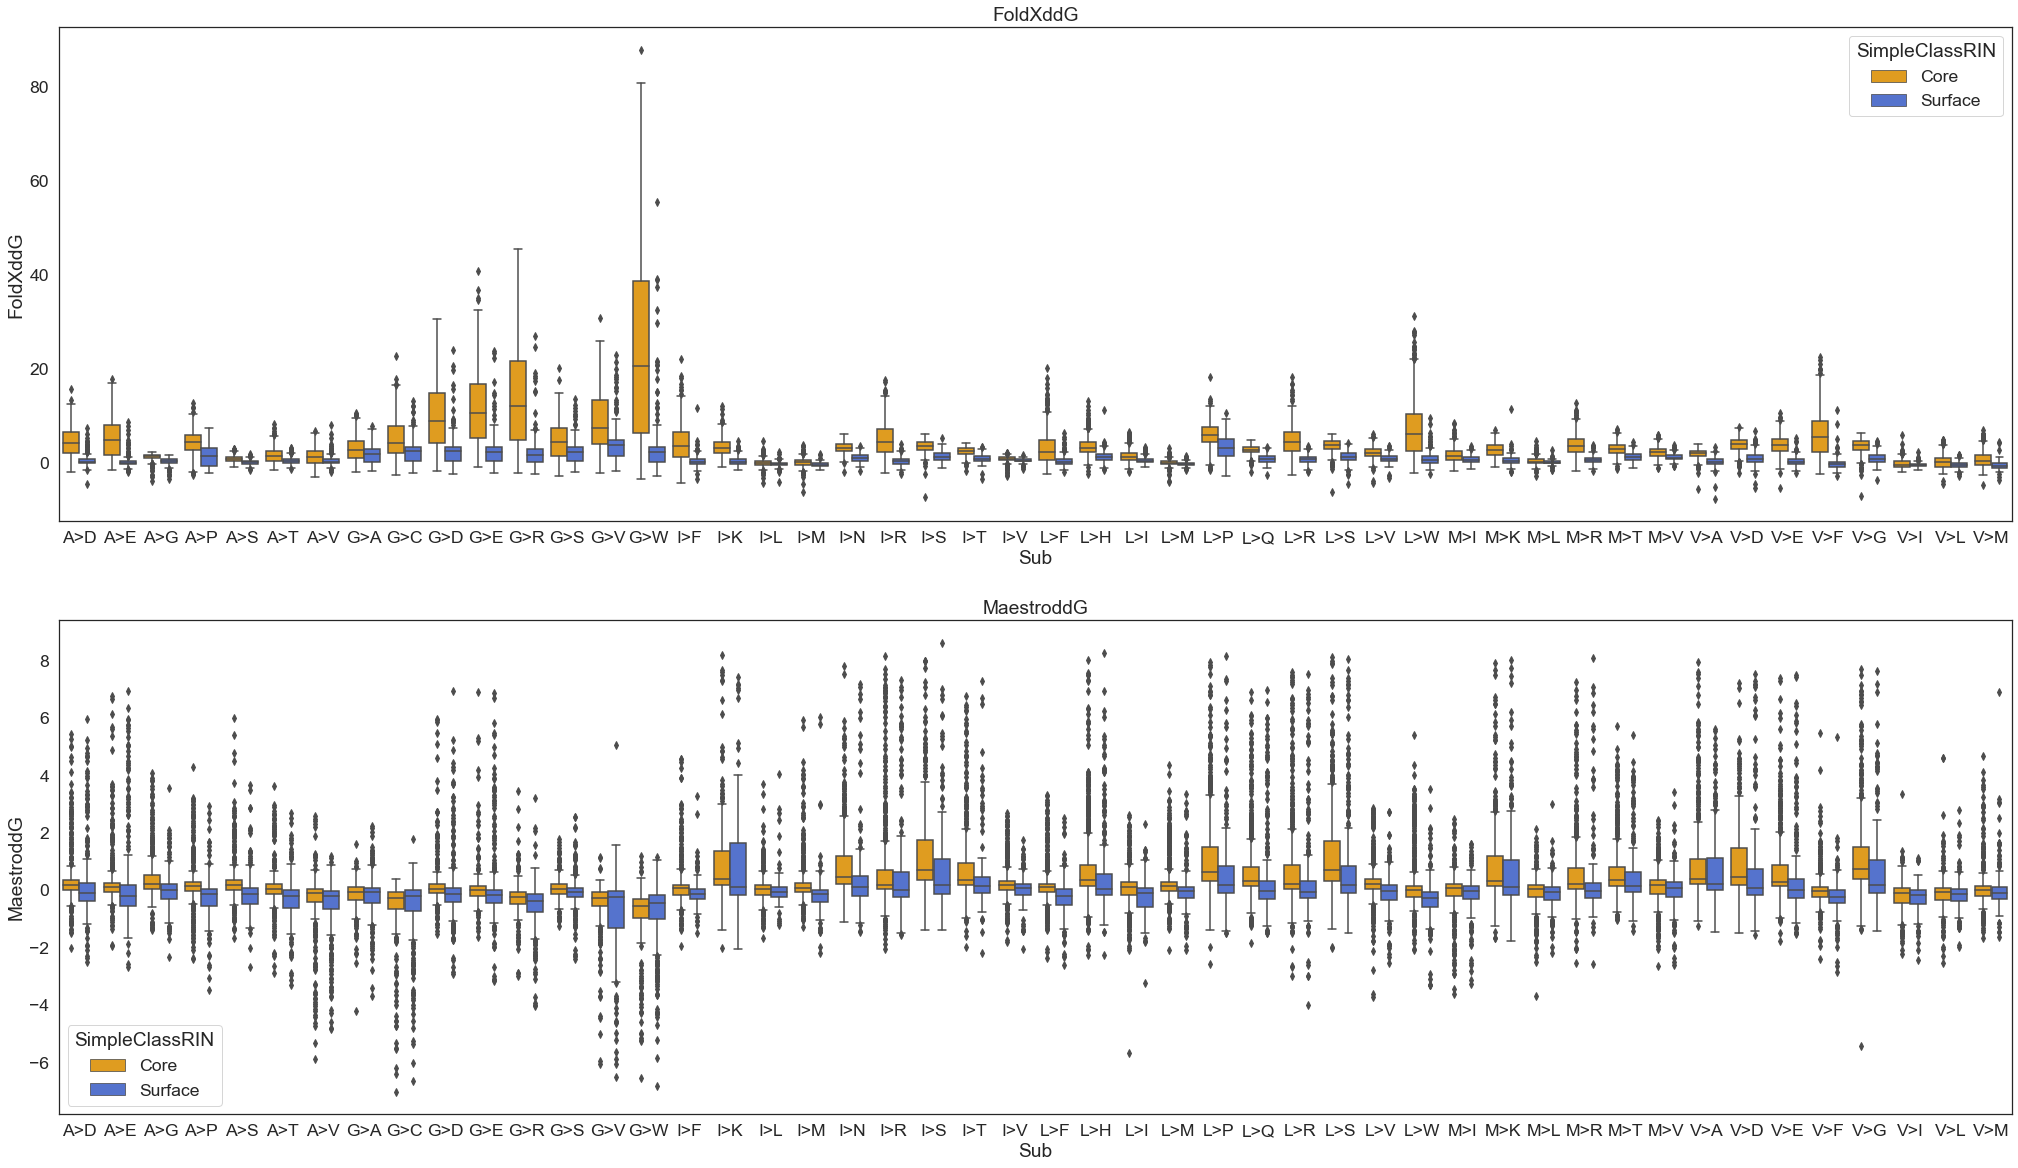

In [18]:
nonpolar_aliphatic = ['G','A','V','L','M','I']

sns.set(style="white", font_scale=1.6)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(35, 20))
my_col = {"Core": "orange", "Surface": "royalblue"}

sns.boxplot(data=ran_df[((ran_df.SimpleClassRIN == "Core") |
                        (ran_df.SimpleClassRIN == "Surface")) 
                        & (ran_df.FoldXddG < 500) 
                        & (ran_df.AA1.isin(nonpolar_aliphatic))].sort_values('Sub'), 
            x='Sub', y='FoldXddG', hue='SimpleClassRIN', palette=my_col, ax = ax1);

sns.boxplot(data=ran_df[((ran_df.SimpleClassRIN == "Core") |
                        (ran_df.SimpleClassRIN == "Surface")) 
                        & (ran_df.MaestroddG < 500) 
                        & (ran_df.AA1.isin(nonpolar_aliphatic))].sort_values('Sub'), 
            x='Sub', y='MaestroddG', hue='SimpleClassRIN', palette=my_col, ax = ax2);

ax1.set_title("FoldXddG")
ax2.set_title("MaestroddG")


Text(0.5, 1.0, 'MaestroddG')

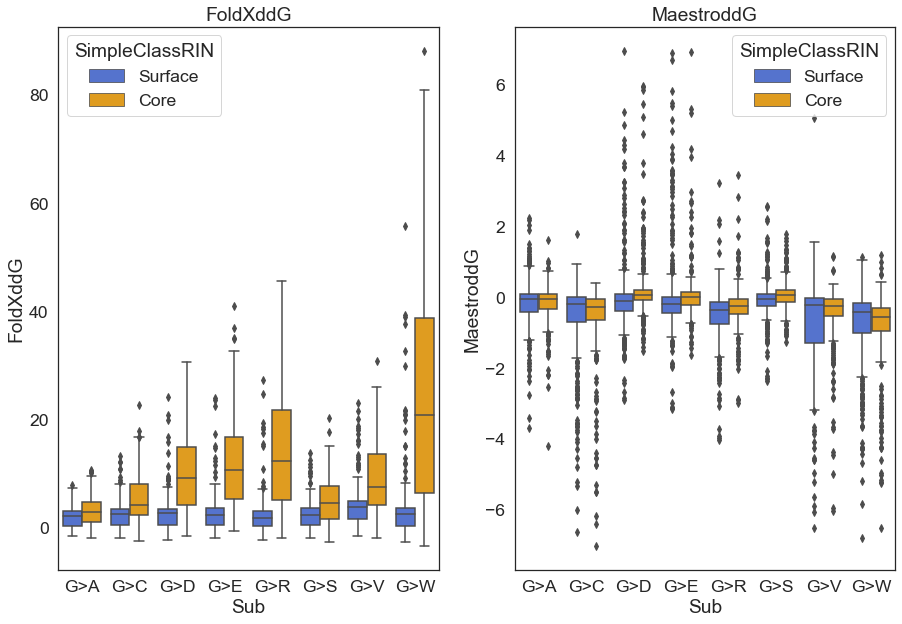

In [28]:
nonpolar_aliphatic = ['G','A','V','L','M','I']

sns.set(style="white", font_scale=1.6)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
my_col = {"Core": "orange", "Surface": "royalblue"}

sns.boxplot(data=ran_df[((ran_df.SimpleClassRIN == "Core") |
                        (ran_df.SimpleClassRIN == "Surface")) 
                        & (ran_df.FoldXddG < 500) 
                        & (ran_df.AA1 == "G")
                        & (ran_df.AA1.isin(nonpolar_aliphatic))].sort_values('Sub'), 
            x='Sub', y='FoldXddG', hue='SimpleClassRIN', palette=my_col, ax = ax1);

sns.boxplot(data=ran_df[((ran_df.SimpleClassRIN == "Core") |
                        (ran_df.SimpleClassRIN == "Surface")) 
                        & (ran_df.MaestroddG < 500) 
                        & (ran_df.AA1 == "G")
                        & (ran_df.AA1.isin(nonpolar_aliphatic))].sort_values('Sub'), 
            x='Sub', y='MaestroddG', hue='SimpleClassRIN', palette=my_col, ax = ax2);

ax1.set_title("FoldXddG")
ax2.set_title("MaestroddG")


In [34]:
(ran_df[(ran_df.SimpleClassRIN == "Core") 
       & (ran_df.FoldXddG < 500) 
       & (ran_df.AA1 == "G")
       & (ran_df.AA1.isin(nonpolar_aliphatic))].sort_values('Sub')).groupby("Sub")[["FoldXddG", "MaestroddG"]].median()

,FoldXddG,MaestroddG
Sub,,
G>A,2.86779,-0.041329
G>C,4.26436,-0.280529
G>D,9.10095,0.063823
G>E,10.66100,-0.001546
G>R,12.26965,-0.235644
G>S,4.57646,0.050465
G>V,7.50759,-0.260485
G>W,20.73980,-0.560117


In [35]:
(ran_df[(ran_df.SimpleClassRIN == "Surface") 
       & (ran_df.FoldXddG < 500) 
       & (ran_df.AA1 == "G")
       & (ran_df.AA1.isin(nonpolar_aliphatic))].sort_values('Sub')).groupby("Sub")[["FoldXddG", "MaestroddG"]].median()

,FoldXddG,MaestroddG
Sub,,
G>A,2.102355,-0.054712
G>C,2.572035,-0.200514
G>D,2.618110,-0.114744
G>E,2.399335,-0.177683
G>R,1.841650,-0.362501
G>S,2.366935,-0.059641
G>V,3.814450,-0.215628
G>W,2.484140,-0.426617


In [41]:
def plot_dists(df,
               feature, 
               ran_df=None, 
               xlim=None, 
               savepath=None, 
               verbose=False):
    """
    Plot feature distribution.
    Args:
      df: a pandas dataframe. Should include a column "CV.SigShort".
      feature: a name of the feature to plot.
      ran_df: if provided add distribution for random subs. (Default: None)
      savepath: if provided save the plot to this dist. (Default: None)
      verbose: whether to print log messages. (Default: False)
    Returns:
      nothing; saves/plots a graph.
    """
    sns.set(style="white", font_scale=1.3)
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15, 10),
                                                    gridspec_kw={'height_ratios': [3, 3, 2]})
    
    if verbose: print(f"{df[df[feature] == '?'].shape[0]} ClinVar allels have undefined {feature} and will be removed.")
    df_filtered = df[df[feature] != "?"]
    df_filtered[feature] = pd.to_numeric(df_filtered[feature])
    
    if ran_df is not None:
        if verbose: 
            print(f"{ran_df[ran_df[feature] == '?'].shape[0]} random allels have undefined {feature} and will be removed.")
        ran_df = ran_df[ran_df[feature] != "?"]
        ran_df[feature] = pd.to_numeric(ran_df[feature])
            
    sns.distplot(df_filtered[(df_filtered["CV.SigShort"] == "Benign")][feature], 
                color="g", label="Benign", kde=False, ax=ax1)
    sns.distplot(df_filtered[(df_filtered["CV.SigShort"] == "Pathogenic")][feature], 
                color="r", label="Pathogenic", kde=False, ax=ax1)
    if ran_df is not None:
        sns.distplot(ran_df[feature], color="lightslategrey", label="Random", kde=False, ax=ax1)
        
    sns.kdeplot(df_filtered[(df_filtered["CV.SigShort"] == "Benign")][feature], 
                color="g", label="Benign", ax=ax2, cut=1, shade=True)
    sns.kdeplot(df_filtered[(df_filtered["CV.SigShort"] == "Pathogenic")][feature], 
                color="r", label="Pathogenic", ax=ax2, cut=1, shade=True)
    if ran_df is not None:
        sns.kdeplot(ran_df[feature], color="lightslategrey", label="Random", ax=ax2, cut=1, shade=True)

    df_filtered["SubClass"] = df_filtered["CV.SigShort"]
    
    if ran_df is not None:
        ran_df["SubClass"] = "Random"
        bp_df = pd.concat([df_filtered[[feature, "SubClass"]], ran_df[[feature, "SubClass"]]]).reset_index()
        
        x_order = ["Benign", "Pathogenic", "Random"]
        palette = {"Benign": "mediumseagreen", "Pathogenic": "r", "Random": "lightslategrey"}
        
    else: 
        bp_df = df_filtered
        x_order = ["Benign", "Pathogenic"]
        palette = {"Benign": "mediumseagreen", "Pathogenic": "r"} 
    
    sns.boxplot(data=bp_df, x=feature, y="SubClass", color="SubClass",
                orient="h", ax=ax3, linewidth=2, order=x_order, palette=palette)

    ax1.set_xlabel('')
    ax2.set_xlabel("")
    ax3.set_xlabel(f"{feature}")
    
    ax1.set_ylabel('counts')
    ax2.set_ylabel('density')
    ax3.set_ylabel("")
        
    if xlim: plt.xlim(xlim[0], xlim[1])

    if savepath: 
        plt.savefig(f"{savepath}/{feature}.png", bbox_inches='tight')
        plt.close()
    else: plt.show();

In [42]:
# read data
print(f"Importing data...")
cv_df = pd.read_csv("../results/ClinVar_preprocessed.csv.gz", compression='gzip', low_memory=0)

print(f"{cv_df.shape[0]} ClinVar variants before filtering.")

cv_df.rename(columns={'SM.ClassRIN': 'SimpleClassRIN'}, inplace=True)

# filter variants
cv_df = cv_df[cv_df["CV.SigShort"] != "Drug response"]
print(f"{cv_df.shape[0]} ClinVar variants after removal of 'Drug response'.")

cv_df = cv_df[cv_df["CV.SigShort"] != "VUS"]
print(f"{cv_df.shape[0]} ClinVar variants after removal of 'VUS'.")

# map sctructure classes to groups
cv_df["SimpleClassRIN"] = cv_df["SimpleClassRIN"].map({
    'Protein interaction': 'Protein_interaction', 
    'Surface': 'Surface',
    'Core': 'Core',
    'ligand interaction': 'Other_interactions',
    'DNA interaction': 'Other_interactions',
    'ion interaction': 'Other_interactions',
    'metal interaction': 'Other_interactions',
    'RNA interaction': 'Other_interactions',
    'Disorder': 'None',
    'None': 'None'
})

Importing data...
216255 ClinVar variants before filtering.
216085 ClinVar variants after removal of 'Drug response'.
50798 ClinVar variants after removal of 'VUS'.


224 ClinVar allels have undefined FoldXddG and will be removed.
0 random allels have undefined FoldXddG and will be removed.


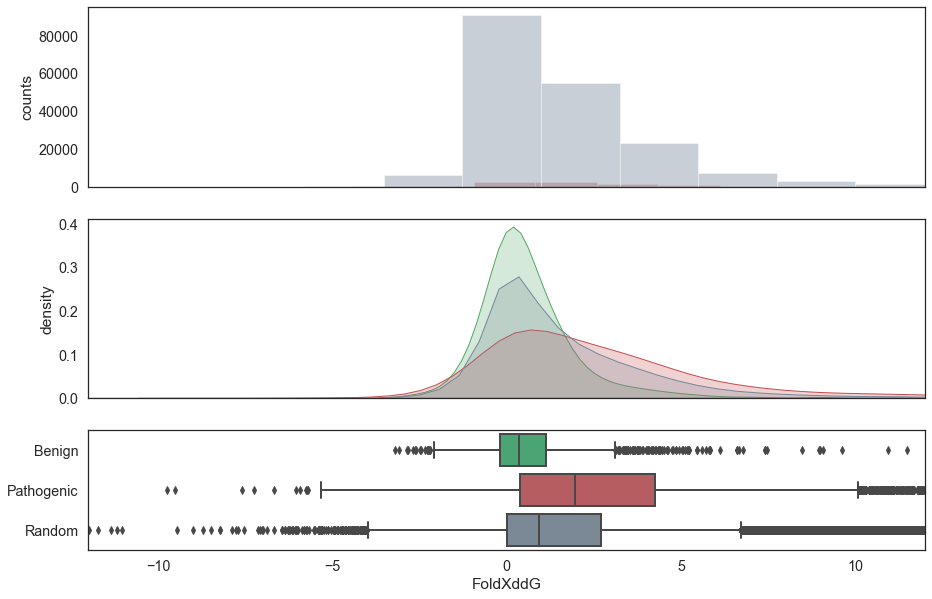

In [44]:
cv_df_filtered = cv_df[(cv_df["PDBAAMatch"] == 1) & 
                       (cv_df['SM.Ide'] >= 0.95) & 
                       (cv_df['SM.Coverage'] >= 0.5)
                      ]
cv_df_filtered['SM.Resol'] = cv_df_filtered['SM.Resol'].astype("float")
cv_df_filtered = cv_df_filtered[(cv_df_filtered['SM.Resol'] <= 4.5)]

plot_dists(cv_df_filtered, "FoldXddG", ran_df=ran_df, xlim=(-12, 12), verbose=1)

195 ClinVar allels have undefined MaestroddG and will be removed.
0 random allels have undefined MaestroddG and will be removed.


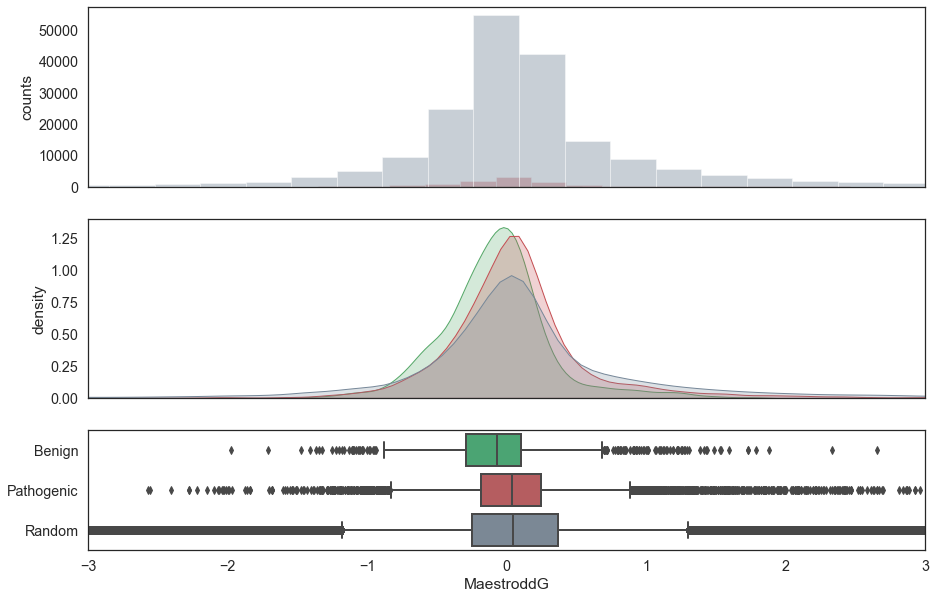

In [47]:
plot_dists(cv_df_filtered, "MaestroddG", ran_df=ran_df, xlim=(-3, 3), verbose=1)